In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

#load the dataset
train = pd.read_csv("kaggle/wids-training.csv")
test =  pd.read_csv("kaggle/wids-test.csv")

In [19]:
train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.62

In [20]:
train.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12905.000000,12902.000000,12905.000000,1.290200e+04,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,12.862036,12.066978,13.441936,12.620903,7.653389,3.996221,50.095180,49.904900,47.680767,12.670532,33.834497,5.813387,3.202241,51.848542,74374.366908,3.269565,2.514251,4.142938,3.929804,4.071951,8.401565,11.561127,16.892327,12.664050,15.827931,16.723986,32.551917,36520.522622,65.994359,7575.709216,3.398172e+05,1237.303024,31.337751,11.989616,27.556060,28.924532,19.273300,12.257566,31.530866,43.385130,61.619846,5.952955,13.214106,1.861784,69.718255,11.447491,5.470315,0.900217,0.139318,5.682117,6.641799,18.459019,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,2.324922,1.248499,1.643221,2.571528,2.147138,1.236823,1.656640,1.656594,7.491146,2.047935,8.019483,1.537171,0.224519,6.807659,20712.590100,1.448217,1.341073,1.767872,1.445416,1.345323,2.209765,2.577412,2.719725,1.831453,3.175040,8.940311,11.128674,8195.162293,14.117453,4916.905130,2.516976e+05,427.836972,4.775799,5.143849,7.992479,4.890567,6.173655,5.939814,11.632189,4.636082,5.945359,1.947654,3.411691,3.056104,17.960882,12.532624,6.735789,2.499784,0.505940,6.252393,3.544494,17.030894,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,1.500000,0.800000,0.000000,0.200000,0.000000,0.000000,39.725000,38.400000,0.900000,0.200000,13.440000,0.000000,2.550370,19.312121,29222.000000,0.750000,0.361538,1.015385,1.027778,1.100000,2.650000,1.700000,4.950000,4.733333,4.288889,0.840000,5.692593,4316.000000,15.850000,0.000000,6.062900e+04,448.400000,17.415789,0.000000,0.000000,7.200000,2.465714,2.094118,7.048837,23.914706,30.700000,0.823077,2.262963,0.000000,14.495652,0.060976,0.000000,0.000000,0

In [21]:
train.info

<bound method DataFrame.info of        patient_id patient_race  payer_type patient_state  patient_zip3  \
0          475714          NaN    MEDICAID            CA           924   
1          349367        White  COMMERCIAL            CA           928   
2          138632        White  COMMERCIAL            TX           760   
3          617843        White  COMMERCIAL            CA           926   
4          817482          NaN  COMMERCIAL            ID           836   
...           ...          ...         ...           ...           ...   
12901      674178        White         NaN            OH           436   
12902      452909          NaN  COMMERCIAL            CA           945   
12903      357486          NaN  COMMERCIAL            CA           926   
12904      935417          NaN         NaN            NY           112   
12905      179597     Hispanic    MEDICAID            FL           336   

       patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0     

In [22]:
train

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.62

In [23]:
train.select_dtypes(include = 'object')

,patient_race,payer_type,patient_state,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division
0,NaN,MEDICAID,CA,F,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific
1,White,COMMERCIAL,CA,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific
2,White,COMMERCIAL,TX,F,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central
3,White,COMMERCIAL,CA,F,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific
4,NaN,COMMERCIAL,ID,F,1749,"Malignant neoplasm of breast (female), unspeci...",C773,NaN,NaN,West,Mountain
...,...,...,...,...,...,...,...,...,...,...,...
12901,White,NaN,OH,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,Midwest,East North Central
12902,NaN,COMMERCIAL,CA,F,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,West,Pacific
12903,NaN,COMMERCIAL,CA,F,C50912,Malignant neoplasm of unspecified site of left...,C7931,NaN,NaN,West,Pacific
12904,NaN,NaN,NY,F,1749,"Malignant neoplasm of breast (female), unspeci...",C773,NaN,NaN,Northeast,Middle Atlantic


In [24]:
#This code calculate the percentage of missing data per every row.
for column in train.columns:
    null_count = train[column].isnull().sum()
    if null_count > 0:
        percent_nulls = (null_count / train.shape[0]) * 100
        print(f'{column} : {percent_nulls:.2f}% nulls')

patient_race : 49.47% nulls
payer_type : 13.97% nulls
patient_state : 0.40% nulls
bmi : 69.46% nulls
metastatic_first_novel_treatment : 99.81% nulls
metastatic_first_novel_treatment_type : 99.81% nulls
Region : 0.40% nulls
Division : 0.40% nulls
population : 0.01% nulls
density : 0.01% nulls
age_median : 0.01% nulls
age_under_10 : 0.01% nulls
age_10_to_19 : 0.01% nulls
age_20s : 0.01% nulls
age_30s : 0.01% nulls
age_40s : 0.01% nulls
age_50s : 0.01% nulls
age_60s : 0.01% nulls
age_70s : 0.01% nulls
age_over_80 : 0.01% nulls
male : 0.01% nulls
female : 0.01% nulls
married : 0.01% nulls
divorced : 0.01% nulls
never_married : 0.01% nulls
widowed : 0.01% nulls
family_size : 0.03% nulls
family_dual_income : 0.03% nulls
income_household_median : 0.03% nulls
income_household_under_5 : 0.03% nulls
income_household_5_to_10 : 0.03% nulls
income_household_10_to_15 : 0.03% nulls
income_household_15_to_20 : 0.03% nulls
income_household_20_to_25 : 0.03% nulls
income_household_25_to_35 : 0.03% nulls


In [25]:
train.drop(['metastatic_first_novel_treatment','metastatic_first_novel_treatment_type','patient_race','payer_type','bmi'], axis=1, inplace=True)

In [26]:
#This code calculate the percentage of missing data per every row.
for column in train.columns:
    null_count = train[column].isnull().sum()
    if null_count > 0:
        percent_nulls = (null_count / train.shape[0]) * 100
        print(f'{column} : {percent_nulls:.2f}% nulls')

patient_state : 0.40% nulls
Region : 0.40% nulls
Division : 0.40% nulls
population : 0.01% nulls
density : 0.01% nulls
age_median : 0.01% nulls
age_under_10 : 0.01% nulls
age_10_to_19 : 0.01% nulls
age_20s : 0.01% nulls
age_30s : 0.01% nulls
age_40s : 0.01% nulls
age_50s : 0.01% nulls
age_60s : 0.01% nulls
age_70s : 0.01% nulls
age_over_80 : 0.01% nulls
male : 0.01% nulls
female : 0.01% nulls
married : 0.01% nulls
divorced : 0.01% nulls
never_married : 0.01% nulls
widowed : 0.01% nulls
family_size : 0.03% nulls
family_dual_income : 0.03% nulls
income_household_median : 0.03% nulls
income_household_under_5 : 0.03% nulls
income_household_5_to_10 : 0.03% nulls
income_household_10_to_15 : 0.03% nulls
income_household_15_to_20 : 0.03% nulls
income_household_20_to_25 : 0.03% nulls
income_household_25_to_35 : 0.03% nulls
income_household_35_to_50 : 0.03% nulls
income_household_50_to_75 : 0.03% nulls
income_household_75_to_100 : 0.03% nulls
income_household_100_to_150 : 0.03% nulls
income_hous

In [30]:
numerical_cols = train.select_dtypes(exclude=['object']).columns
categorical_columns = train.select_dtypes(include=['object']).columns

In [31]:
# Impute categorical columns using mode
for col in categorical_columns:
    if col != 'DiagPeriodL90D':
        mode = train[col].mode()[0]
        train[col].fillna(mode, inplace=True)
        test[col].fillna(mode, inplace=True)

# Impute numerical columns using mean
for col in numerical_cols:
    if col != 'DiagPeriodL90D':
        mean = train[col].median()
        train[col].fillna(mean, inplace=True)
        test[col].fillna(mean, inplace=True)

In [32]:
#This code calculate the percentage of missing data per every row.
for column in train.columns:
    null_count = train[column].isnull().sum()
    if null_count > 0:
        percent_nulls = (null_count / train.shape[0]) * 100
        print(f'{column} : {percent_nulls:.2f}% nulls')

In [34]:
test['DiagPeriodL90D'] = 2
df = pd.concat([train,test])

In [35]:
from sklearn.preprocessing import OrdinalEncoder


# Initialize the encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# Loop through each categorical column
for col in categorical_columns.to_list()+['patient_zip3']:
    # Fit the encoder on the training data
    encoder.fit(df[[col]])

    # Transform both training and test data
    df[col] = encoder.transform(df[[col]])
    
cols = ['breast_cancer_diagnosis_code','metastatic_cancer_diagnosis_code','patient_zip3','patient_age','payer_type',
        'patient_state','breast_cancer_diagnosis_desc','population','density','race_black']

train = df[df['DiagPeriodL90D']!=2]
test = df[df['DiagPeriodL90D']==2].drop(columns=['DiagPeriodL90D']) 

In [36]:
corr = train.corr()

<Axes: >

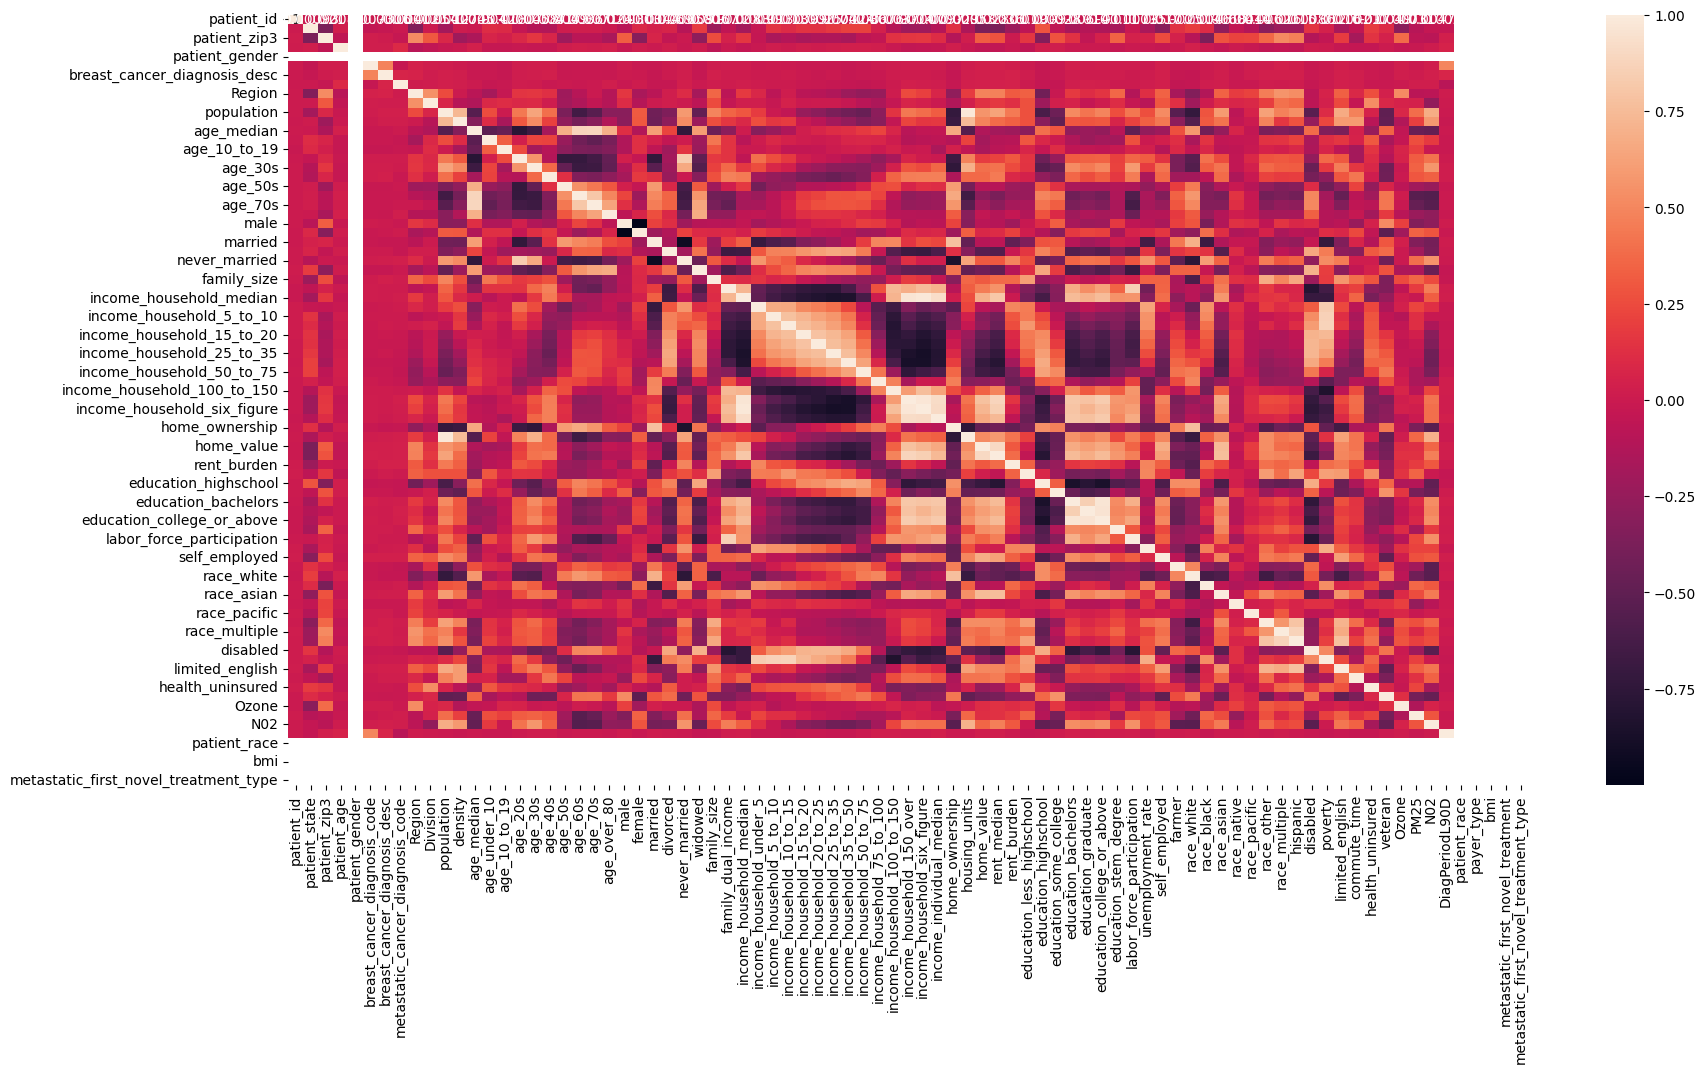

In [43]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)

In [39]:
x = train.iloc[:,1:-1].values

In [40]:
y = test.iloc[:,-1].values

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,test, test_size = 0.25, random_state = 45)

ValueError: Found input variables with inconsistent numbers of samples: [12906, 5792]